# Data analysis

In [39]:
import pandas as pd
import numpy as np
from nltk.corpus import words

In [2]:
songs = pd.read_json('data/all_genres_en.json')
songs.head()

,name,author,link,lyrics,chords,genre,actual_name,language,clean_lyrics
0,As Long As The Grass Shall Grow,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"As long, As the moon shall rise, As ...","['A', 'E', 'A', 'A', 'E', 'A', 'D', 'D', 'A', ...",Country,As Long As The Grass Shall Grow,en,"As long, As the moon shall rise, As ..."
1,Delias Gone (ver 4),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"Delia, oh, Delia Delia all my life\r\nIf I had...","['A', 'D', 'A', 'A7', 'D', 'B7', 'E', 'A', 'D'...",Country,Delias Gone,en,"Delia, oh, Delia Delia all my life If I hadn't..."
2,Mean Eyed Cat,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,I gave my woman half my money at the general s...,"['E', 'B7', 'E', 'A7', 'B7', 'E', 'E', 'B7', '...",Country,Mean Eyed Cat,en,I gave my woman half my money at the general s...
3,I Couldnt Keep From Crying,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"I SAW YOU WALKING BY HIS SIDE,\r\nHEARD YOU W...","['A', 'A7', 'D', 'A', 'E7', 'A', 'A7', 'D', 'A...",Country,I Couldnt Keep From Crying,en,"I SAW YOU WALKING BY HIS SIDE, HEARD YOU WHIS..."
4,It Aint Me Babe (ver 3),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,Go 'way from my window leave at your own chose...,"['A', 'Bm', 'A', 'E', 'A', 'A', 'Bm', 'A', 'E'...",Country,It Aint Me Babe,en,Go 'way from my window leave at your own chose...


#### Genres

<AxesSubplot:>

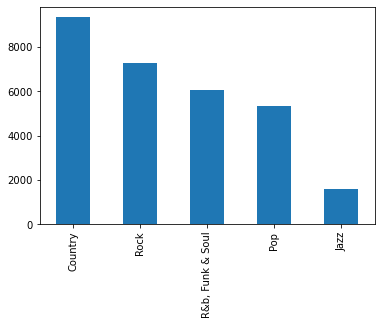

In [11]:
songs['genre'].value_counts().plot(kind='bar')


#### Tokenization + lemmatization
Do word counts for the lyrics of all songs through the different genres.

#### Compare number of words per genre
Uses nltk for tokenization + lemmatization: https://medium.com/mlearning-ai/nlp-tokenization-stemming-lemmatization-and-part-of-speech-tagging-9088ac068768


In [3]:
import spacy
from tokenizer import tokenizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load('en_core_web_sm')
# nlp.remove_pipe('tagger')
# nlp.remove_pipe('parser')
nlp.remove_pipe('ner')
nlp.remove_pipe('senter')

stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [45]:
lyrics_per_genre = {}
for genre in songs.genre.value_counts().keys():
    lyrics_per_genre[genre] = ' '.join(songs[songs.genre == genre]['lyrics']).lower().replace('-', '')

In [5]:
def wordcloud_most_common_words(lyrics):
    font_path = 'Roboto/Roboto-Black.ttf'
    # lower max_font_size
    wordcloud = WordCloud(font_path=font_path, width=6000, height=3000, background_color="black", colormap='Set1').generate(lyrics)
    wordcloud.recolor(colormap='gist_rainbow', random_state=1)
    #black: gist_rainbow
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [46]:
len(lyrics_per_genre['Rock'])

8876592

In [51]:
class Genre:
    def __init__(self, name):
        
        corpus = set(words.words())
        nlp.max_length = 11_000_000

        self.name = name
        print(f'\n---> Creating spacy document for genre: {name}.')
        self.doc = nlp(lyrics_per_genre[name][0:500_000])
        print(f'Getting NOUN, VERB, and PRONOUN frequencies.')
        self.nouns = [token.lemma_ for token in self.doc if token.pos_ == 'NOUN' and token.is_stop == False and token.is_punct == False and token.text in corpus]
        self.verbs = [token.lemma_ for token in self.doc if token.pos_ == 'VERB' and token.is_stop == False and token.is_punct == False and token.text in corpus]
        self.pronouns = [token.lemma_ for token in self.doc if token.pos_ == 'PRON' and token.is_stop == False and token.is_punct == False and token.text in corpus]
        self.nouns_freq = Counter(self.nouns)
        self.verbs_freq = Counter(self.verbs)
        self.pronouns_freq = Counter(self.pronouns)

        print(f'NOUNS: {self.nouns_freq.most_common(7)}')
        print(f'VERBS: {self.verbs_freq.most_common(7)}')
        print(f'PRONOUNS: {self.pronouns_freq.most_common(7)}')

        self.unique_nouns = self.get_unique_nouns()
        print(f'Number of unique nouns: {len(self.unique_nouns)}.')

    
    def get_unique_nouns(self):
        corpus = set(words.words())
        filtered_set = set()
        for word in np.unique(self.nouns):
            if word in corpus:
                filtered_set.add(word)
        return filtered_set
        

In [52]:
country = Genre('Country')
rock = Genre('Rock')
rb_funk_soul = Genre('R&b, Funk & Soul')
pop = Genre('Pop')
jazz = Genre('Jazz')


---> Creating spacy document for genre: Country.
Getting NOUN, VERB, and PRONOUN frequencies.
NOUNS: [('love', 427), ('time', 350), ('man', 330), ('day', 287), ('way', 249), ('heart', 246), ('night', 214)]
VERBS: [('know', 610), ('get', 461), ('go', 419), ('come', 351), ('love', 269), ('let', 251), ('tell', 245)]
PRONOUNS: [('somebody', 52), ('everybody', 29), ('ya', 11), ('thee', 9), ('thy', 5), ('anybody', 4), ('em', 4)]
Number of unique nouns: 1774.

---> Creating spacy document for genre: Rock.
Getting NOUN, VERB, and PRONOUN frequencies.
NOUNS: [('love', 421), ('time', 349), ('day', 245), ('baby', 242), ('way', 223), ('man', 214), ('girl', 194)]
VERBS: [('know', 645), ('get', 510), ('come', 449), ('go', 442), ('love', 301), ('think', 286), ('tell', 282)]
PRONOUNS: [('somebody', 48), ('everybody', 46), ('ya', 17), ('anybody', 7), ('la', 6), ('em', 5), ('s', 4)]
Number of unique nouns: 1635.

---> Creating spacy document for genre: R&b, Funk & Soul.
Getting NOUN, VERB, and PRONOUN 

#### Number of unique lemmas per genre